<a href="https://colab.research.google.com/github/ary-puraskar/Creditworthiness-Classification/blob/main/Creditworthiness_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This algorithm intends to classify the credit score of the person based on various attributes. Credit score is used to calculate the creditworthiness by Banks and financial institutions. Based on the credit score, the loan approvals are done.

The customers are labelled as Good, Standard or Poor based on the credit score.

In [ ]:
import numpy as np
import pandas as pd

After the necessary libraries are imported, the dataset is loaded and read using the pandas dataframe. The dataset is taken from the Kaggle website.

In [ ]:
dataframe = pd.read_csv("train.csv")
print(dataframe.head())

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


In [ ]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

It indicates that there are no any null values to be removed

In [ ]:
print(dataframe.describe())

                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417 

In [ ]:
print(dataframe.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [ ]:
dataframe["Credit_Score"].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


These libraries are important for the graph visualization

<ipython-input-8-5651f3e01196>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Occupation",


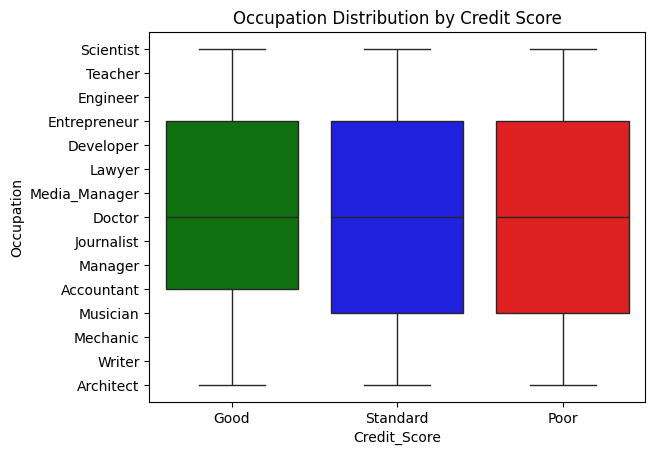

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Occupation",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Occupation Distribution by Credit Score")
plt.show()


It shows that the occupation doesn't have significant role in determining the credit score.

---



<ipython-input-9-9598d2f75a44>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Age",


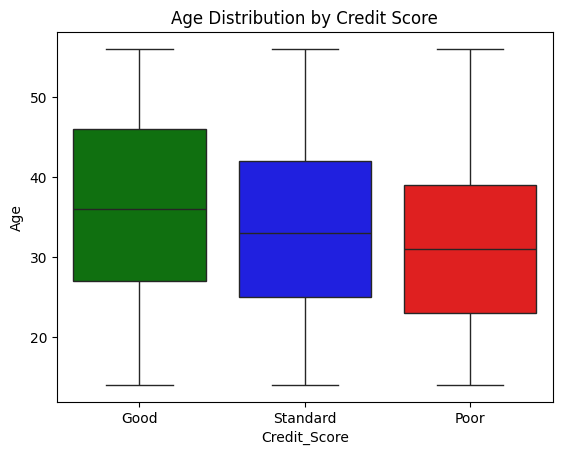

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Age",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Age Distribution by Credit Score")
plt.show()


According to this boxplot, age also doesn't play significant role in determining the credit score.

<ipython-input-10-5c32bd52eaa6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Annual_Income",


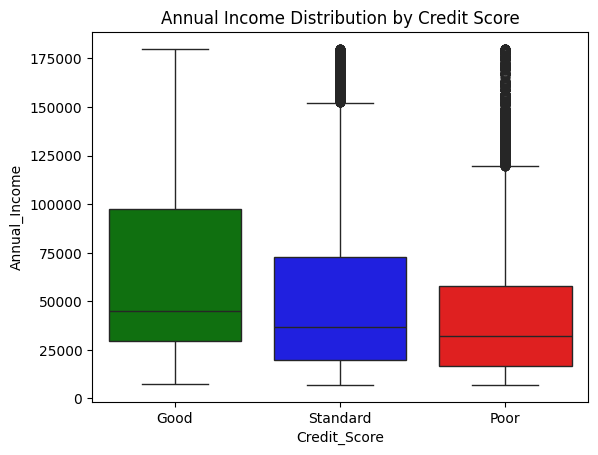

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Annual_Income",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Annual Income Distribution by Credit Score")
plt.show()


It shows that the credit score increases as per your salary. The more you earn, better your scores are. There are some outliers which can be seen in the graph.

<ipython-input-11-7e0747bb7ca5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Monthly_Inhand_Salary",


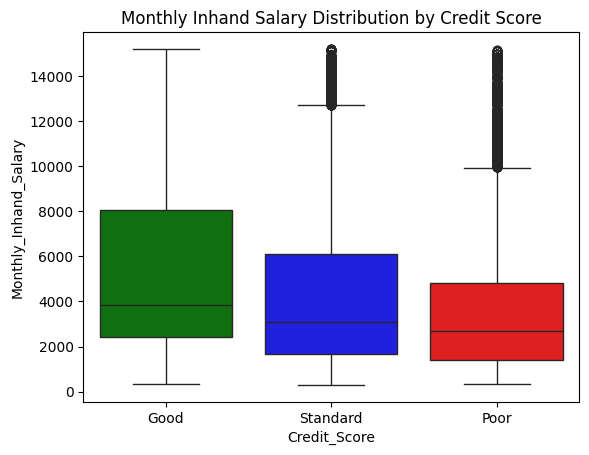

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Monthly_Inhand_Salary",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Monthly Inhand Salary Distribution by Credit Score")
plt.show()


Inhand salary shows same behaviour as the previous graph.

<ipython-input-12-6b837a3623eb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Num_Bank_Accounts",


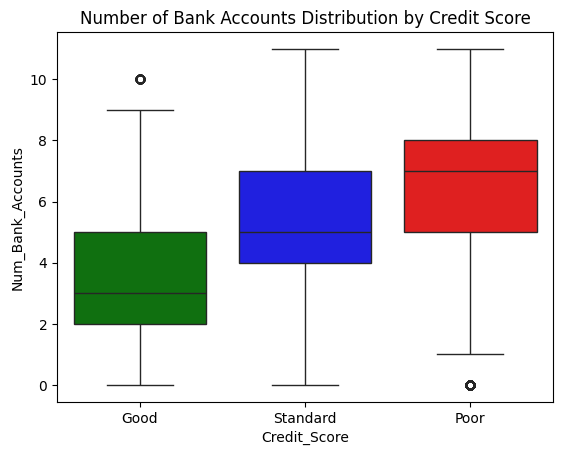

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Num_Bank_Accounts",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Number of Bank Accounts Distribution by Credit Score")
plt.show()

It clearly shows that having more bank accounts impacts directly in the creditworthiness. More than 5 bank account holders are seen in the group of poor credit score.

<ipython-input-13-5e43a45ad615>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Num_Credit_Card",


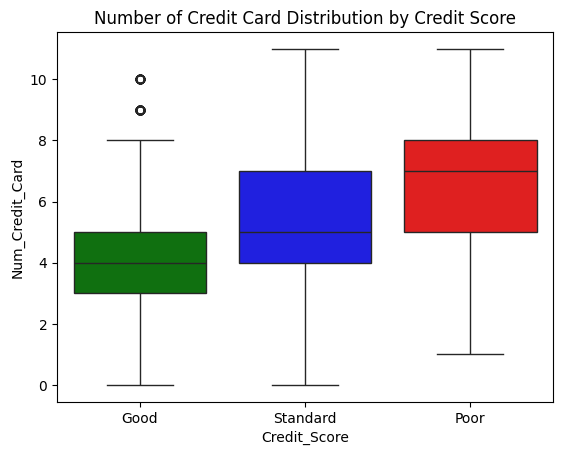

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Num_Credit_Card",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Number of Credit Card Distribution by Credit Score")
plt.show()

This visualization also shows similar trend as the above graph. Having more than 5 credit cards impacts negatively on the credit score.

<ipython-input-14-675a79e95f4e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Interest_Rate",


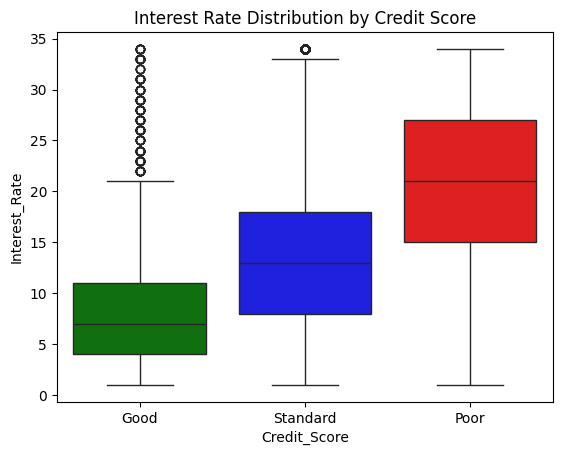

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Interest_Rate",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Interest Rate Distribution by Credit Score")
plt.show()

The interest rate from 5-12 % is ideal for maintaining good credit score.

<ipython-input-15-316446a6d546>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Num_of_Loan",


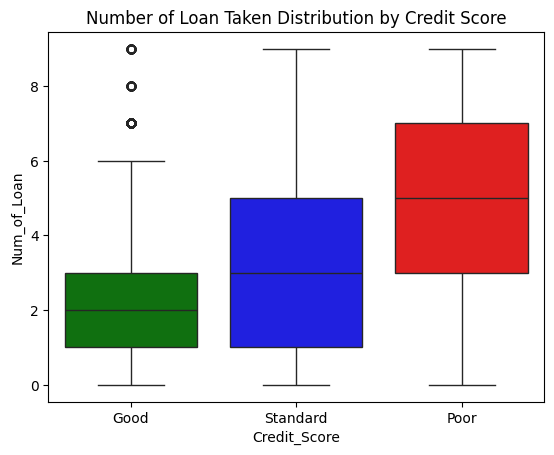

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Num_of_Loan",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Number of Loan Taken Distribution by Credit Score")
plt.show()

The number of loans taken has direct impact on the credit score which can be visualized from the graph. Similarly, all other features are analyzed using the seaborn and matplotlib library.

<ipython-input-16-1941cd2c6c97>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Delay_from_due_date",


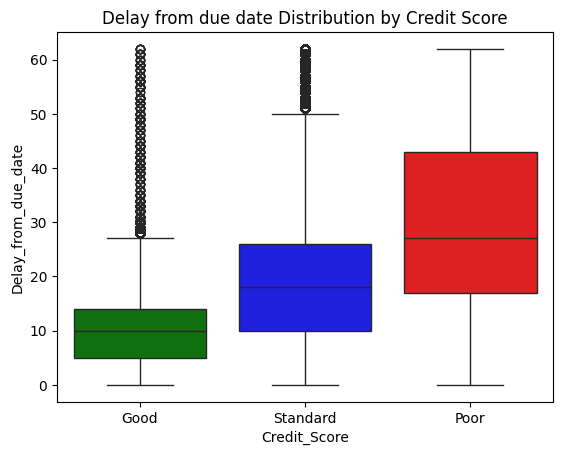

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Delay_from_due_date",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Delay from due date Distribution by Credit Score")
plt.show()

<ipython-input-17-0c4c7b0091b4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Num_of_Delayed_Payment",


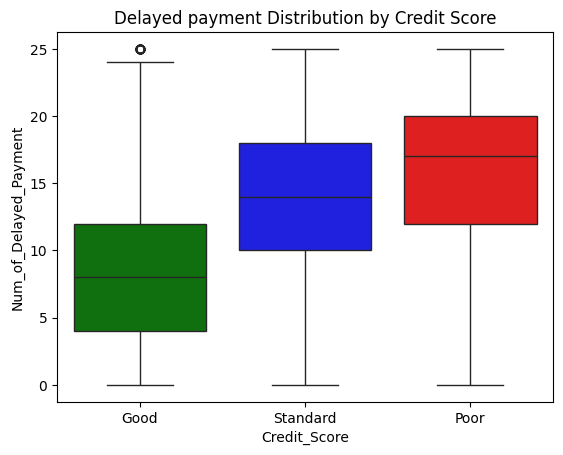

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Num_of_Delayed_Payment",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Delayed payment Distribution by Credit Score")
plt.show()

<ipython-input-18-e746ac9d427c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Outstanding_Debt",


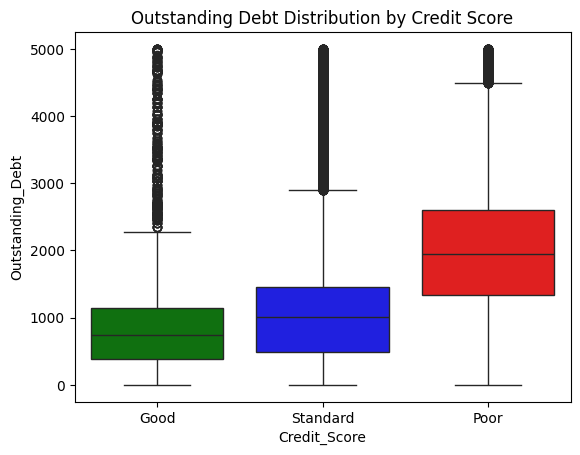

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Outstanding_Debt",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Outstanding Debt Distribution by Credit Score")
plt.show()

<ipython-input-19-09d1919acaf4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Credit_Utilization_Ratio",


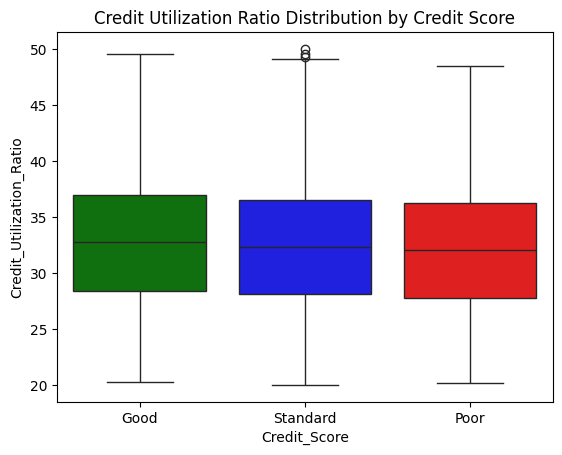

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Credit_Utilization_Ratio",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Credit Utilization Ratio Distribution by Credit Score")
plt.show()

<ipython-input-20-ec62baae0927>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Credit_History_Age",


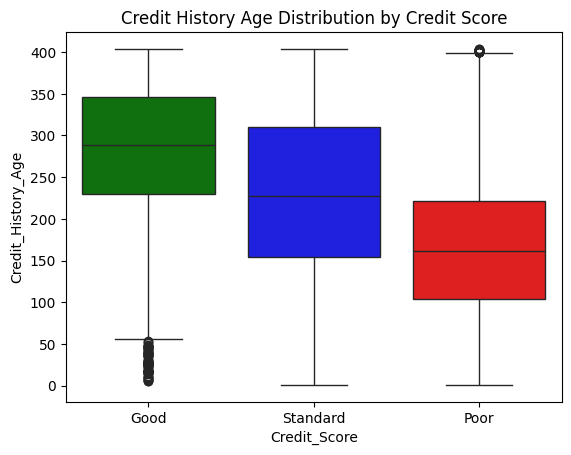

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Credit_History_Age",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Credit History Age Distribution by Credit Score")
plt.show()

<ipython-input-21-78185903a5a6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Total_EMI_per_month",


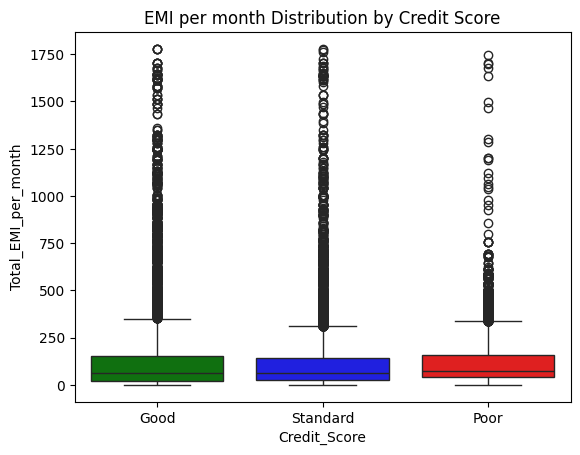

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Total_EMI_per_month",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("EMI per month Distribution by Credit Score")
plt.show()

<ipython-input-22-f201b90cd2f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Amount_invested_monthly",


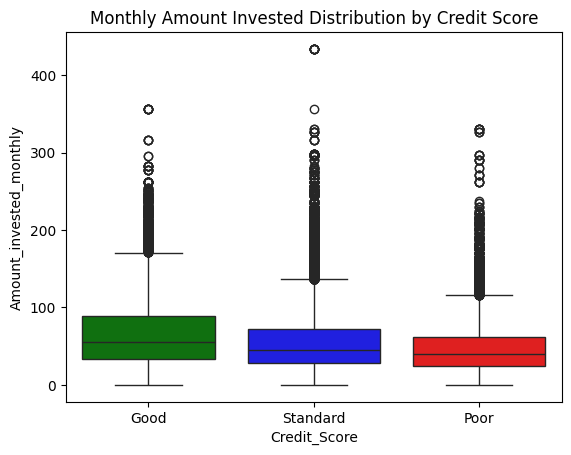

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Amount_invested_monthly",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Monthly Amount Invested Distribution by Credit Score")
plt.show()

<ipython-input-23-86dcc8d7e2de>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x="Credit_Score", y="Monthly_Balance",


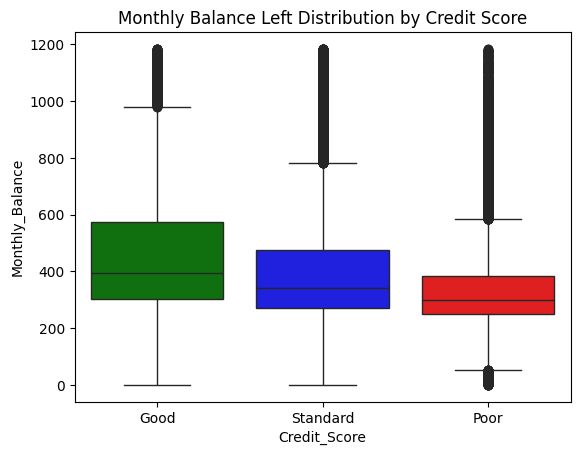

In [ ]:
sns.boxplot(data=dataframe, x="Credit_Score", y="Monthly_Balance",
            palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'})
plt.title("Monthly Balance Left Distribution by Credit Score")
plt.show()

In [ ]:
print(dataframe["Credit_Mix"].unique())

['Good' 'Standard' 'Bad']


In [ ]:
dataframe["Credit_Mix"] = dataframe["Credit_Mix"].map({"Good": 1,
                               "Standard": 2,
                               "Bad": 0})

Credit mix is the indication of a borrower’s experience managing multiple types of loans. It is in categorical format, so we need to map into numerical values 0,1 and 2.

In [ ]:
from sklearn.model_selection import train_test_split
X=np.array(dataframe[["Annual_Income", "Monthly_Inhand_Salary",
                   "Num_Bank_Accounts", "Num_Credit_Card",
                   "Interest_Rate", "Num_of_Loan",
                   "Delay_from_due_date", "Num_of_Delayed_Payment",
                   "Credit_Mix", "Outstanding_Debt",
                   "Credit_History_Age", "Monthly_Balance"]])

The following features are found to be significant in determining the target variable.

In [ ]:
Y=np.array(dataframe[["Credit_Score"]])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc=RandomForestClassifier()
Rfc.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

Random forest is more precise form of decision trees. Hence, it is used to improve the model accuracy.

Credit Score Prediction:

Annual Income: 19114.12

Monthly Inhand Salary: 1824.8433333333328

Number of Bank Accounts: 2

Number of Credit cards: 4

Interest rate: 3

Number of Loans: 4

Average number of days delayed by the person: 3

Number of delayed payments: 6

Credit Mix (Bad: 0, Standard: 2, Good: 1) : 1

Outstanding Debt: 809.98

Credit History Age: 272.0

Monthly Balance: 358.12416760938714

In [ ]:
features= Rfc.predict(np.array([[19114.12,1824.8433333333328,2,4,3,4,3,6,1,809.98,272.0,358.12416760938714]]))

In [ ]:
print(features)

['Standard']


The model is tested using various values from the dataset. It is found that the model performs accurately with accuracy score of 80%.

In [ ]:
Y_pred=Rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.807939393939394